In [73]:
 #import numpy, pandas, scipy.stats, matplotlib, seaborn
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



In [74]:
#1... DATA PREPROCESSING AND CLEANING
df = pd.read_csv('dermatology_database_1.csv')
df.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [75]:
#Handling inconsistency in 'age' column
df['age'] = df['age'].replace('?', np.nan)
df['age'].sample(20)


116    27
111    18
192    25
343     9
222    18
37     15
105    39
51     35
228    50
218    45
257    25
299    52
155    40
284    70
241    25
225    40
25     33
324    53
95     18
70     34
Name: age, dtype: object

In [76]:
df['age'] = pd.to_numeric(df['age'], errors = 'coerce') #Converting age to numeric
df['age'] = df['age'].fillna(df['age'].median())
df['age'].sample(20)

56     22.0
50     32.0
66     36.0
349     7.0
24     22.0
106    60.0
262    35.0
124    29.0
330    33.0
310    50.0
62     33.0
209    27.0
70     34.0
286    45.0
148    30.0
36     35.0
44     30.0
193    18.0
158    33.0
219    35.0
Name: age, dtype: float64

In [77]:
#Checking for duplicates
print('Duplicate Rows : ', df.duplicated().sum())

Duplicate Rows :  0


In [78]:
#Chekcing age outliers(Analysing Descriptive statistics of age):
print('Age stats:\n ', df['age'].describe())


Age stats:
  count    366.000000
mean      36.267760
std       15.156875
min        0.000000
25%       25.000000
50%       35.000000
75%       48.000000
max       75.000000
Name: age, dtype: float64


In [79]:
#USing quantile functions to find the IQR & Identifying outliers(if any) using 1.5 IQR rule
q1  = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = (q3-q1)


In [80]:
#Identifying Outliers using IQR and 1.5 IQR rules
lower_threshold , upper_threshold = q1-(1.5*iqr) , q3 + (1.5*iqr)
print(f"Lower Outlier Threshold : {lower_threshold} \nUpper Outlier Threshold : {upper_threshold}")

outliers = df[(df['age'] < lower_threshold) | (df['age'] > upper_threshold)]
if len(outliers) == 0:
    print("No Outliers detected")
else:
    print(f"Found {len(outliers)} outliers")

Lower Outlier Threshold : -9.5 
Upper Outlier Threshold : 82.5
No Outliers detected


In [81]:
#Save the Cleaned Dataset
df.to_csv('dermatology_cleaned.csv', index = True)

In [82]:
#2... STATISTICAL ANALYSIS
df = pd.read_csv('dermatology_cleaned.csv')
#Descriptive Statistics
pd.set_option('display.max_columns', None)
df.describe()

,Unnamed: 0,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,182.500000,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760,2.803279
std,105.799338,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.156875,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,91.250000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,182.500000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,273.750000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,365.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000



Analysing Descriptive Statistics

####Step1 : The count row for all features is 366, matching the total number of patient observations, indicating no missing values in this dataset.:
Step2 : Analysing 'Mean' and 'Median(50%)':
Analyzing each Attribute :
Erythema - All goodFor 'erythema' (mean 2.07, median 2), the mean and median are very close, suggesting a relatively symmetrical distribution around a score of 2. This indicates that a score of 2 is common for erythema in this patient cohort, but some variability exists.

Definitive Borders : For 'definite_borders', the median is 2 while the mean is 1.55. This indicates a left skew in the distribution, where a larger proportion of patients have higher scores (around 2 or 3), pulling the mean slightly lower. The standard deviation of 0.9 suggests a moderate spread around the mean within the 0-3 scoring range, indicating some variability in the presence and intensity of definite borders.

Itching - the median is 1 and the mean is 1.37. The positive difference suggests a right-skewed distribution, where the majority of patients experience less itching (scores around 1), but a tail of patients reports higher itching scores. The standard deviation of 1.37 is **relatively large**, indicating substantial variability in itching severity across the patient population, ranging from no itching (score 0) to severe itching (score 3).

koebner_phenomenon - the median is 0 and the mean is 0.63. This signifies a strong right-skewed distribution. The majority of patients do not exhibit the Koebner phenomenon (score 0), but some patients do, pulling the mean upwards. The standard deviation of 0.9, while moderate, reflects the fact that scores are concentrated at 0, but there's a spread towards higher scores among those who exhibit the phenomenon (up to score 3).

Polygonal_Papules (0 & 0.45), knee & Elbow inviolvement (0 & 0.6), disapperance_granular_layer (0 & 0.5), vacuolisation_damage_basal_layer(0 & 0.45), spongiosis(0 & 0.95), saw_tooth_appearance_retes(0 & 0.45), band_like_infiltrate(0 & 0.55)


In [83]:
#Dividing the Clinical and Histopathlogical Features(Used GPT 4 to categorise the features)
clinical_features = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement'
]

histo_epidermal_features = [
    'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
    'clubbing_rete_ridges', 'elongation_rete_ridges',
    'thinning_suprapapillary_epidermis', 'spongiform_pustule',
    'munro_microabcess', 'focal_hypergranulosis',
    'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
    'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
    'perifollicular_parakeratosis', 'melanin_incontinence'
]

histo_dermal_features = [
    'eosinophils_infiltrate', 'PNL_infiltrate',
    'fibrosis_papillary_dermis', 'inflammatory_mononuclear_infiltrate',
    'band_like_infiltrate'
]

additional_features = ['family_history', 'age']
all_features = clinical_features + histo_epidermal_features + histo_dermal_features + additional_features
df

,Unnamed: 0,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25.0,4
362,362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36.0,4
363,363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28.0,3
364,364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50.0,3


In [84]:
#Create composite scores,Feature Engineering
df['clinical_score'] = df[clinical_features].sum(axis=1)
df['epidermal_score'] = df[histo_epidermal_features].sum(axis=1)
df['dermal_score'] = df[histo_dermal_features].sum(axis=1)
df['total_symptom_score'] = df['clinical_score'] + df['epidermal_score'] + df['dermal_score']

# Severity ratios
df['clinical_to_histo_ratio'] = df['clinical_score'] / (df['epidermal_score'] + df['dermal_score'] + 0.1)  # +0.1 to avoid division by zero
df['total_symptom_score'], df['clinical_to_histo_ratio']


(0      17
 1      30
 2      35
 3      33
 4      36
        ..
 361    11
 362    15
 363    40
 364    32
 365    33
 Name: total_symptom_score, Length: 366, dtype: int64,
 0      0.879121
 1      0.869565
 2      0.746269
 3      0.497738
 4      0.710900
          ...   
 361    0.819672
 362    0.864198
 363    0.663900
 364    0.773481
 365    0.646766
 Name: clinical_to_histo_ratio, Length: 366, dtype: float64)

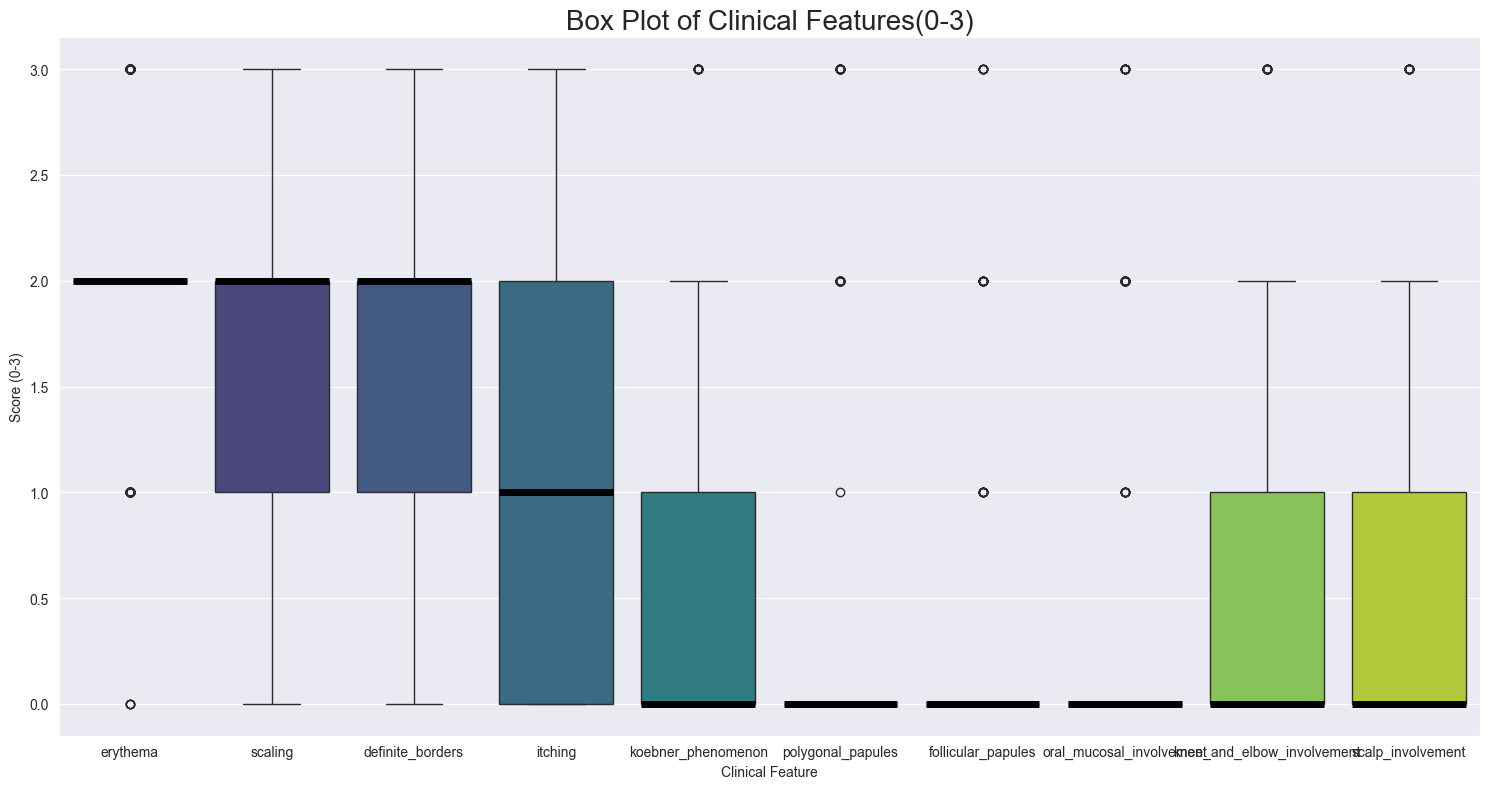

In [85]:
#Box Plot for Clinical Features
plt.figure(figsize = (15,8))
sns.boxplot(data = df[clinical_features], palette = 'viridis', medianprops = dict(color = 'black',linewidth = 5))
plt.title("Box Plot of Clinical Features(0-3)",fontsize = 20)
plt.xticks(rotation=0)
plt.ylabel('Score (0-3)')
plt.xlabel('Clinical Feature')
plt.tight_layout()
plt.show()

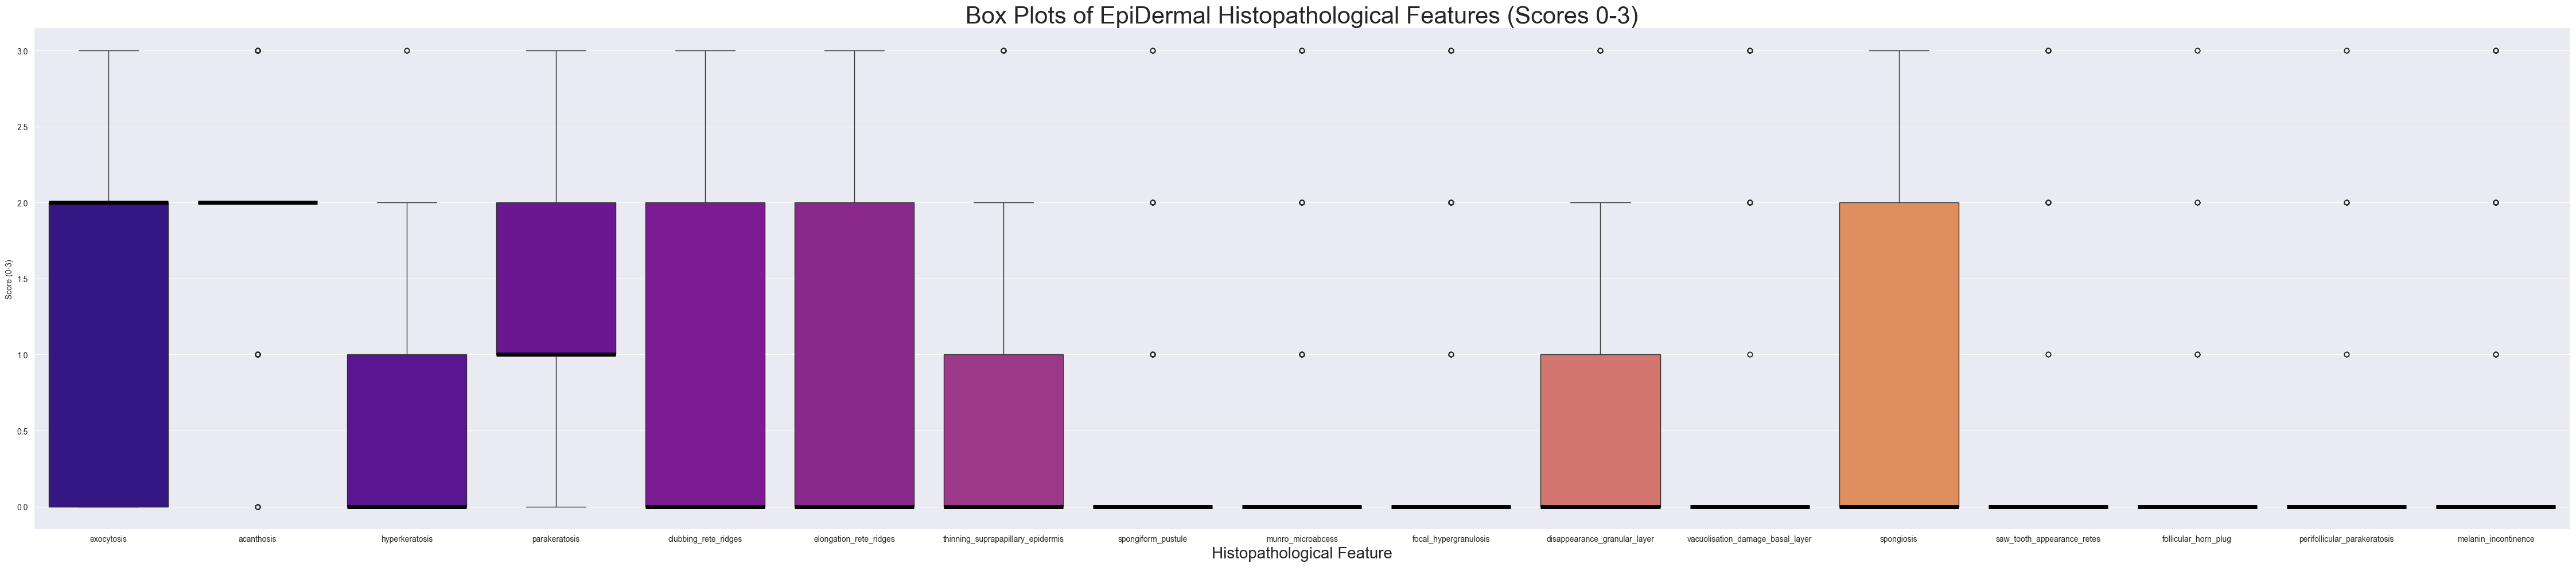

In [106]:
#Box Plot for Histopathological Features(EPIDERMAL)/ Melting DF to long format for plotting
# Define the list of epidermal features
plt.figure(figsize=(45, 10))
sns.boxplot(data=df[histo_epidermal_features], palette='plasma',medianprops = dict(color = 'black',linewidth = 5))
plt.title('Box Plots of EpiDermal Histopathological Features (Scores 0-3)', fontsize = 30)
plt.ylabel('Score (0-3)')
plt.xlabel('Histopathological Feature',fontsize = 20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


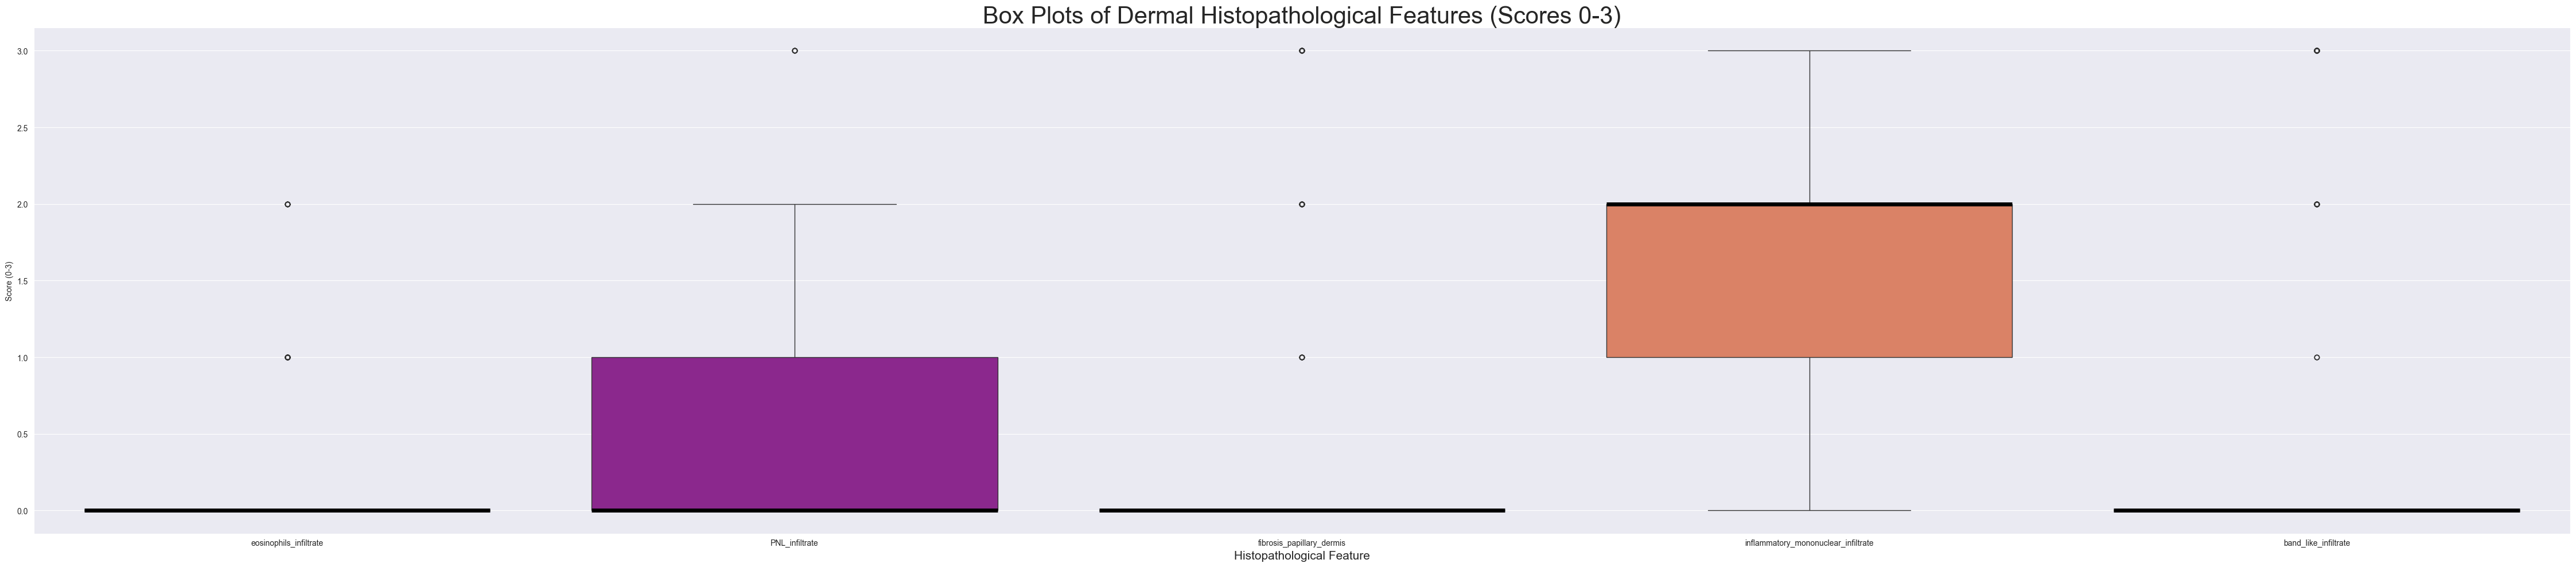

In [87]:
  #Box Plot for Histopathological Features(DERMAL)
plt.figure(figsize=(45, 10))
sns.boxplot(data=df[histo_dermal_features], palette='plasma',medianprops = dict(color = 'black',linewidth = 5))
plt.title('Box Plots of Dermal Histopathological Features (Scores 0-3)', fontsize = 30)
plt.ylabel('Score (0-3)')
plt.xlabel('Histopathological Feature',fontsize = 15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Most histopathological features exhibit either positive or negative skew, indicating asymmetry in their distributions. A majority of patients tend to score in the moderate range (1–2), though a few features show outliers at the extremes (0 or 3), suggesting variability in expression among patients.

Class code:          Class:                     Number of instances:
       1             psoriasis			                112
       2             seboreic dermatitis                 61
       3             lichen planus                       72
       4             pityriasis rosea                    49
       5             cronic dermatitis                   52
       6             pityriasis rubra pilaris            20

In [88]:
class_means = df.groupby('class').mean()
class_means

,Unnamed: 0,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,clinical_score,epidermal_score,dermal_score,total_symptom_score,clinical_to_histo_ratio
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,195.071429,2.285714,2.196429,2.098214,0.946429,0.669643,0.000000,0.035714,0.000000,1.633929,1.526786,0.285714,0.000000,0.035714,1.116071,0.000000,0.267857,2.098214,0.821429,2.000000,2.116071,2.258929,2.053571,0.857143,1.151786,0.000000,1.196429,0.008929,0.000000,0.000000,0.000000,0.000000,1.866071,0.026786,39.339286,11.392857,14.830357,3.044643,29.267857,0.644344
2,134.442623,2.278689,2.065574,0.950820,1.622951,0.032787,0.000000,0.016393,0.000000,0.065574,0.114754,0.049180,0.000000,0.459016,1.081967,0.000000,2.196721,1.770492,0.213115,0.983607,0.000000,0.163934,0.016393,0.163934,0.000000,0.000000,0.000000,0.000000,2.163934,0.000000,0.016393,0.016393,1.606557,0.032787,35.459016,7.147541,7.704918,3.180328,18.032787,0.690275
3,178.291667,2.083333,1.625000,2.097222,2.277778,1.347222,2.277778,0.000000,1.916667,0.027778,0.027778,0.013889,2.055556,0.166667,0.000000,0.055556,2.263889,2.111111,0.291667,1.208333,0.000000,0.000000,0.000000,0.000000,0.041667,1.986111,0.236111,2.305556,1.097222,2.291667,0.013889,0.000000,2.250000,2.722222,39.888889,13.680556,15.902778,5.194444,34.777778,0.655005
4,208.734694,1.897959,1.510204,1.183673,0.469388,1.183673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061224,0.122449,0.000000,2.040816,1.448980,0.306122,0.755102,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.387755,0.000000,1.959184,0.020408,0.000000,0.000000,1.775510,0.000000,35.265306,6.244898,6.938776,1.959184,15.142857,0.713946
5,187.538462,1.500000,1.134615,0.846154,1.884615,0.000000,0.000000,0.230769,0.000000,0.038462,0.000000,0.000000,0.000000,0.076923,0.000000,2.288462,0.846154,2.250000,0.692308,0.750000,0.076923,1.884615,0.019231,0.019231,0.000000,0.000000,0.000000,0.000000,0.346154,0.000000,0.019231,0.000000,1.826923,0.019231,36.538462,5.634615,6.903846,4.211538,16.750000,0.541648
6,196.450000,2.050000,1.750000,1.050000,0.500000,0.000000,0.000000,2.200000,0.000000,1.700000,0.500000,0.500000,0.000000,0.000000,0.150000,0.000000,1.500000,1.650000,0.800000,1.250000,0.100000,0.100000,0.000000,0.050000,0.000000,0.050000,0.000000,0.000000,1.200000,0.000000,1.750000,2.050000,1.600000,0.050000,10.250000,9.750000,10.500000,1.800000,22.050000,0.817561


In [89]:
print("Class distribution:")
class_counts = df['class'].value_counts().sort_index()

class_names = {1: 'Psoriasis', 2: 'Seborrheic Dermatitis', 3: 'Lichen Planus',
               4: 'Pityriasis Rosea', 5: 'Chronic Dermatitis', 6: 'Pityriasis Rubra Pilaris'}

for class_id, count in class_counts.items():
    print(f"Class {class_id} ({class_names[class_id]}): {count} samples ({count/len(df)*100:.1f}%)")

df.groupby('class').count()

Class distribution:
Class 1 (Psoriasis): 112 samples (30.6%)
Class 2 (Seborrheic Dermatitis): 61 samples (16.7%)
Class 3 (Lichen Planus): 72 samples (19.7%)
Class 4 (Pityriasis Rosea): 49 samples (13.4%)
Class 5 (Chronic Dermatitis): 52 samples (14.2%)
Class 6 (Pityriasis Rubra Pilaris): 20 samples (5.5%)


,Unnamed: 0,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,clinical_score,epidermal_score,dermal_score,total_symptom_score,clinical_to_histo_ratio
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112
2,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
3,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72,72
4,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
5,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
6,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


In [90]:
all_features = clinical_features + histo_epidermal_features + histo_dermal_features + additional_features

In [91]:
# Feature importance analysis using individual statistical tests

from scipy.stats import f_oneway

# Test each feature individually
feature_discrimination = []
for feature in all_features:
    groups = []
    for class_id in range(1, 7):
        class_data = df[df['class'] == class_id][feature].dropna()
        if len(class_data) > 0:
            groups.append(class_data.values)

    if len(groups) > 1:
        try:
            stat, pval = f_oneway(*groups)
            feature_discrimination.append((feature, stat, pval))
        except:
            continue

# Sort by F-statistic (higher = more discriminative)
feature_discrimination.sort(key=lambda x: x[1], reverse=True)

print("Top 10 most discriminative features:")
for i, (feature, f_stat, p_val) in enumerate(feature_discrimination[:20]):
    print(f"{i+1}. {feature}: F={f_stat:.2f}, p={p_val:.2e}")

Top 10 most discriminative features:
1. band_like_infiltrate: F=1201.97, p=4.14e-222
2. vacuolisation_damage_basal_layer: F=840.17, p=5.21e-196
3. saw_tooth_appearance_retes: F=730.39, p=5.41e-186
4. perifollicular_parakeratosis: F=719.19, p=6.78e-185
5. polygonal_papules: F=627.24, p=3.02e-175
6. melanin_incontinence: F=553.69, p=1.45e-166
7. fibrosis_papillary_dermis: F=483.22, p=3.09e-157
8. focal_hypergranulosis: F=455.62, p=2.95e-153
9. oral_mucosal_involvement: F=368.62, p=3.44e-139
10. clubbing_rete_ridges: F=366.20, p=9.27e-139
11. thinning_suprapapillary_epidermis: F=356.80, p=4.56e-137
12. elongation_rete_ridges: F=301.78, p=2.36e-126
13. follicular_horn_plug: F=247.27, p=4.68e-114
14. follicular_papules: F=220.30, p=3.56e-107
15. knee_and_elbow_involvement: F=117.79, p=1.54e-73
16. exocytosis: F=112.99, p=1.51e-71
17. spongiosis: F=92.89, p=1.30e-62
18. scalp_involvement: F=92.46, p=2.09e-62
19. munro_microabcess: F=65.55, p=1.52e-48
20. PNL_infiltrate: F=52.91, p=4.35e-41


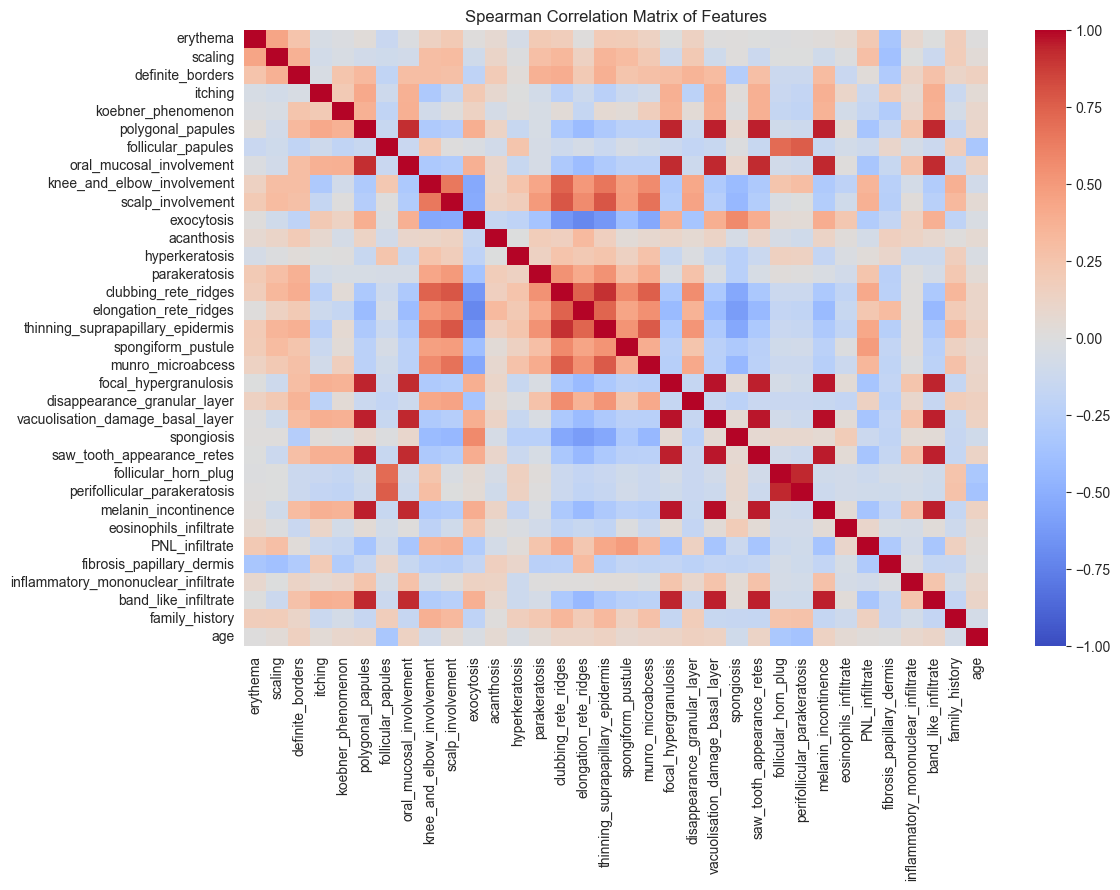

Top 10 feature correlations (absolute values):
 erythema                          erythema                            1.000000
vacuolisation_damage_basal_layer  melanin_incontinence                0.980545
                                  focal_hypergranulosis               0.969554
focal_hypergranulosis             melanin_incontinence                0.966728
saw_tooth_appearance_retes        vacuolisation_damage_basal_layer    0.965544
                                  melanin_incontinence                0.957328
polygonal_papules                 melanin_incontinence                0.952971
focal_hypergranulosis             saw_tooth_appearance_retes          0.952122
band_like_infiltrate              vacuolisation_damage_basal_layer    0.950678
polygonal_papules                 vacuolisation_damage_basal_layer    0.947975
band_like_infiltrate              saw_tooth_appearance_retes          0.947506
melanin_incontinence              band_like_infiltrate                0.947319
poly

In [92]:
#Correlation matrix:
correlation_matrix = df[all_features].corr(method='spearman')

# Visualize correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Spearman Correlation Matrix of Features')
plt.savefig('correlation_matrix_features_only.png')
plt.show()

print("Top 10 feature correlations (absolute values):\n", correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:20])


There is heavy correlations between features that we should pursue 'Dimensionality Reduction' using PCA to reduce redundancy, there by improving model reliability. Moreover, the descriptive statistics suggest that the data is heavily skewed, hence, I would select Kruskal-wallis test to select robust groups for better modeling.

In [93]:
#Preparing data for PCA(Standardizing features)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df[all_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [94]:
#PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [95]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
cumulative_variance

array([0.27175631, 0.43301055, 0.52440268, 0.59005494, 0.62947821,
       0.66503556, 0.69528467, 0.72352661, 0.74918736, 0.77402041,
       0.79766973, 0.81914872, 0.83954171, 0.85910028, 0.87601594,
       0.8927078 , 0.90734921, 0.91979276, 0.93075121, 0.94049948,
       0.94906975, 0.95731475, 0.96461303, 0.97123145, 0.97677377,
       0.98079678, 0.98401936, 0.98698558, 0.98985773, 0.99266894,
       0.99523417, 0.99706026, 0.99869959, 1.        ])

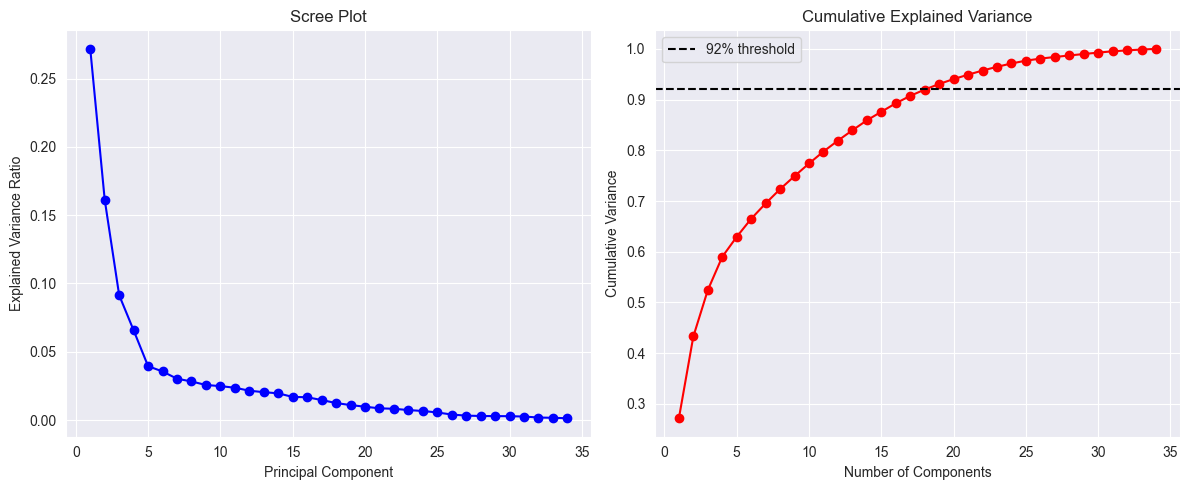

In [96]:
# Scree plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.axhline(y=0.92, color='k', linestyle='--', label='92% threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
n_components_92 = np.argmax(cumulative_variance >= 0.92) + 1
print(f"Number of components for 92% variance: {n_components_92}")

Number of components for 92% variance: 19


In [98]:
pca_92 = PCA(n_components=n_components_92)
X_pca_92 = pca_92.fit_transform(X_scaled)
X_pca_92

array([[ 0.92894469, -2.58228429, -1.15357526, ...,  0.49771693,
        -1.3155948 ,  0.10824725],
       [-3.18265028,  1.97221974,  0.90679966, ..., -0.1575144 ,
        -0.35162266,  0.71663373],
       [ 5.23466388,  2.10104786,  0.59863202, ..., -0.68349772,
         0.5001038 ,  1.54388793],
       ...,
       [ 6.27949557,  3.01182706,  0.44297697, ..., -0.13307712,
        -0.25037347, -0.71740427],
       [ 5.47147639,  2.52235204,  0.32347779, ..., -0.07743588,
         0.26444651, -0.50547562],
       [-4.53929468,  3.14789864,  0.37679208, ...,  0.7446162 ,
        -0.05559559,  0.10598412]], shape=(366, 19))

In [99]:
# Feature importance analysis using individual statistical tests
from scipy.stats import f_oneway

feature_pvalues = {}
for feature in all_features:
    groups = [df[df['class'] == i][feature].values for i in range(1, 7)]
    # Remove empty groups
    groups = [g for g in groups if len(g) > 0]
    if len(groups) > 1:
        stat, pval = f_oneway(*groups)
        feature_pvalues[feature] = pval

# Sort by p-value (most discriminative first)
sorted_features = sorted(feature_pvalues.items(), key=lambda x: x[1])
print("Top 10 most discriminative features:")
for feat, pval in sorted_features[:10]:
    print(f"{feat}: p-value = {pval:.2e}")

Top 10 most discriminative features:
band_like_infiltrate: p-value = 4.14e-222
vacuolisation_damage_basal_layer: p-value = 5.21e-196
saw_tooth_appearance_retes: p-value = 5.41e-186
perifollicular_parakeratosis: p-value = 6.78e-185
polygonal_papules: p-value = 3.02e-175
melanin_incontinence: p-value = 1.45e-166
fibrosis_papillary_dermis: p-value = 3.09e-157
focal_hypergranulosis: p-value = 2.95e-153
oral_mucosal_involvement: p-value = 3.44e-139
clubbing_rete_ridges: p-value = 9.27e-139


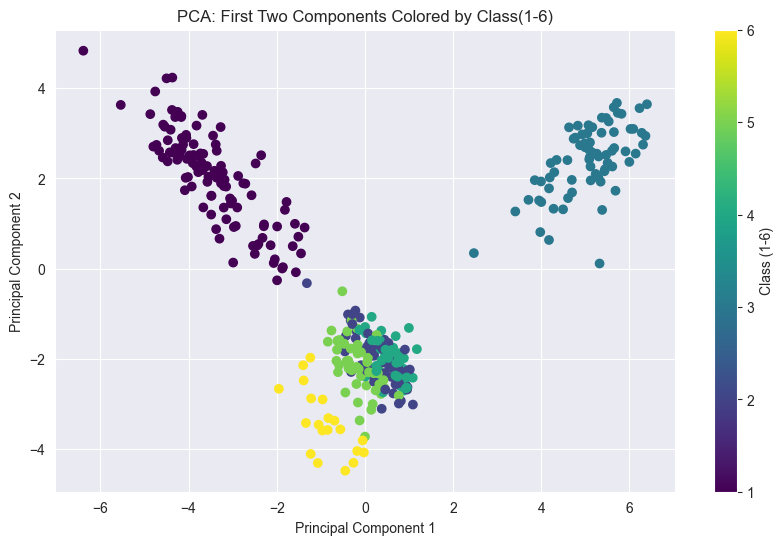

In [100]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_92[:, 0], X_pca_92[:, 1], c=df['class'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Components Colored by Class(1-6)')
plt.colorbar(scatter, label='Class (1-6)')
plt.savefig('pca_first_two_components.png')
plt.show()

In [101]:
#Employing Kruskal-wallis test,
from scipy.stats import kruskal

for i in range(n_components_92):
    groups = [X_pca_92[df['class'] == j, i] for j in range(1, 7)]
    if all(len(g) > 0 for g in groups):
        kw_result = kruskal(*groups)
        print(f"Kruskal-Wallis for PC{i+1}: H-statistic = {kw_result.statistic:.2f}, p-value = {kw_result.pvalue:.4f}")

Kruskal-Wallis for PC1: H-statistic = 329.08, p-value = 0.0000
Kruskal-Wallis for PC2: H-statistic = 285.71, p-value = 0.0000
Kruskal-Wallis for PC3: H-statistic = 247.16, p-value = 0.0000
Kruskal-Wallis for PC4: H-statistic = 240.34, p-value = 0.0000
Kruskal-Wallis for PC5: H-statistic = 79.09, p-value = 0.0000
Kruskal-Wallis for PC6: H-statistic = 50.16, p-value = 0.0000
Kruskal-Wallis for PC7: H-statistic = 10.34, p-value = 0.0661
Kruskal-Wallis for PC8: H-statistic = 2.59, p-value = 0.7623
Kruskal-Wallis for PC9: H-statistic = 7.92, p-value = 0.1606
Kruskal-Wallis for PC10: H-statistic = 6.18, p-value = 0.2888
Kruskal-Wallis for PC11: H-statistic = 30.34, p-value = 0.0000
Kruskal-Wallis for PC12: H-statistic = 13.19, p-value = 0.0217
Kruskal-Wallis for PC13: H-statistic = 4.79, p-value = 0.4420
Kruskal-Wallis for PC14: H-statistic = 18.46, p-value = 0.0024
Kruskal-Wallis for PC15: H-statistic = 11.79, p-value = 0.0378
Kruskal-Wallis for PC16: H-statistic = 1.84, p-value = 0.8707
Kr

Analysis : the above result suggests that PCs 1–6 and PCs 11, 12, 14, 15, 17 are explaining variance of the Class Variable. And the higher values of H-Statistic indicates stronger evidence that supports the PC selection we have done.


Chi-square for family_history vs class: Chi2 = 77.56, p-value = 0.0000, dof = 5


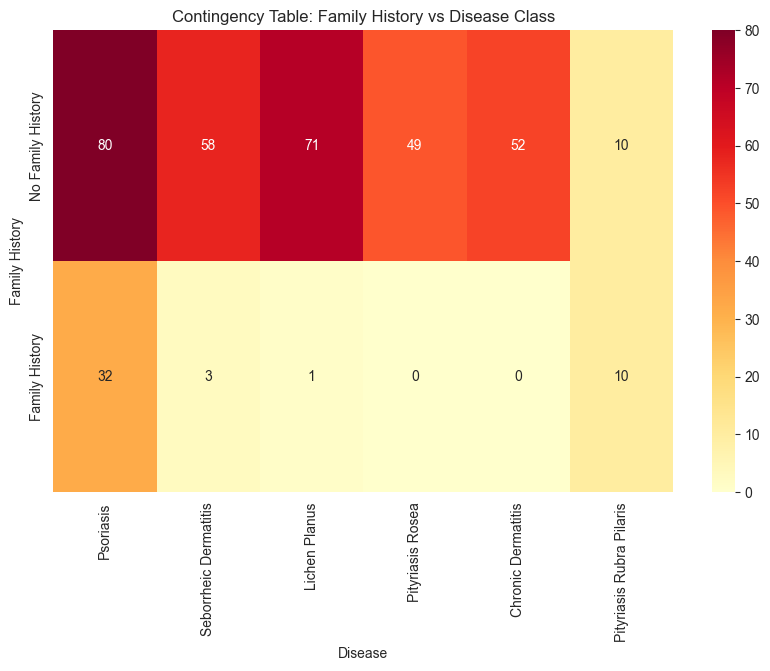

In [102]:
contingency_table = pd.crosstab(df['family_history'], df['class'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square for family_history vs class: Chi2 = {chi2:.2f}, p-value = {p:.4f}, dof = {dof}")
contingency_table.index = ['No Family History', 'Family History']
class_map = {1: 'Psoriasis', 2: 'Seborrheic Dermatitis', 3: 'Lichen Planus',
             4: 'Pityriasis Rosea', 5: 'Chronic Dermatitis', 6: 'Pityriasis Rubra Pilaris'}
contingency_table.columns = [class_map[i] for i in contingency_table.columns]
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Contingency Table: Family History vs Disease Class')
plt.xlabel('Disease')
plt.ylabel('Family History')
plt.savefig('family_history_contingency.png')
plt.show()

The result obtained from the Chi-Square test suggests that there is an association between family history and Class, therefore family history is found to be one of the factors in diagnosing the disease.

In [103]:
selected_pcs = [0, 1, 2, 3, 4, 5, 10, 11, 13, 14, 16]
X_selected_pcs = X_pca[:, selected_pcs]

In [104]:

# 1. PCA Scatter Plots (PC1 vs. all, plus some cross-pairs)
pc_names = [f'PC{i + 1}' for i in selected_pcs]
class_map = {1: 'Psoriasis', 2: 'Seborrheic Dermatitis', 3: 'Lichen Planus',
             4: 'Pityriasis Rosea', 5: 'Chronic Dermatitis', 6: 'Pityriasis Rubra Pilaris'}
df['class_name'] = df['class'].map(class_map)

AttributeError: module 'matplotlib.pyplot' has no attribute 'c'

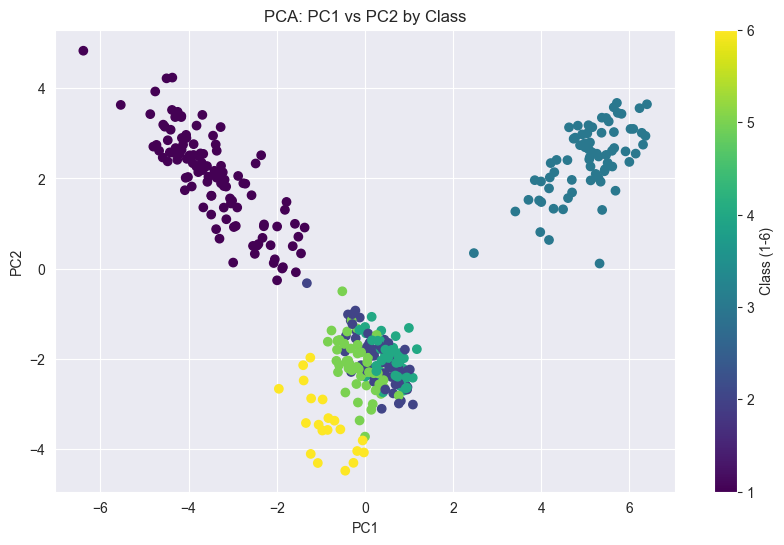

In [105]:
for i in range(len(selected_pcs)):
    for j in range(i + 1, len(selected_pcs)):
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(X_selected_pcs[:, i], X_selected_pcs[:, j], c=df['class'], cmap='viridis')
        plt.xlabel(pc_names[i])
        plt.ylabel(pc_names[j])
        plt.title(f'PCA: {pc_names[i]} vs {pc_names[j]} by Class')
        plt.colorbar(scatter, label='Class (1-6)')
        plt.savefig(f'pca_scatter_{pc_names[i]}_vs_{pc_names[j]}.png')
        plt.c()

In [46]:
from sklearn.preprocessing import LabelEncoder

# Encode string class labels into integers
label_encoder = LabelEncoder()
class_labels_encoded = label_encoder.fit_transform(df['class_name'])

# Now use class_labels_encoded for coloring
for i, j in subset_pairs:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        X_selected_pcs[:, i],
        X_selected_pcs[:, j],
        c=class_labels_encoded,
        cmap='viridis'
    )
    plt.xlabel(pc_names[i])
    plt.ylabel(pc_names[j])
    plt.title(f'PCA: {pc_names[i]} vs {pc_names[j]} by Disease')
    cbar = plt.colorbar(scatter, label='Disease')

    # Optional: Add class labels to colorbar
    cbar.set_ticks(range(len(label_encoder.classes_)))
    cbar.set_ticklabels(label_encoder.classes_)

    plt.savefig(f'pca_scatter_subset_{pc_names[i]}_vs_{pc_names[j]}.png')
    plt.show()


NameError: name 'subset_pairs' is not defined

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/609204605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class_name', palette='Set2')


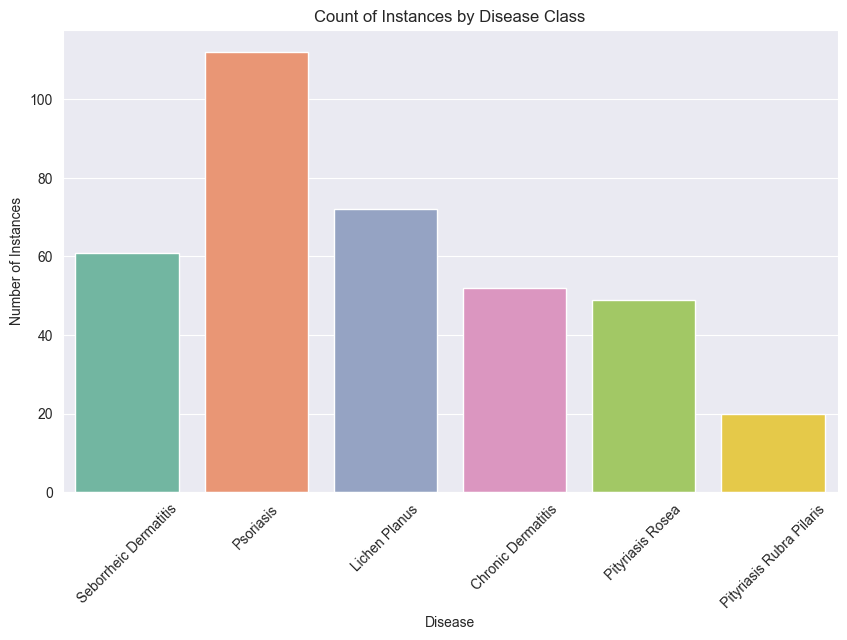

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class_name', palette='Set2')
plt.title('Count of Instances by Disease Class')
plt.xlabel('Disease')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.savefig('class_count_by_disease.png')
plt.show()

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


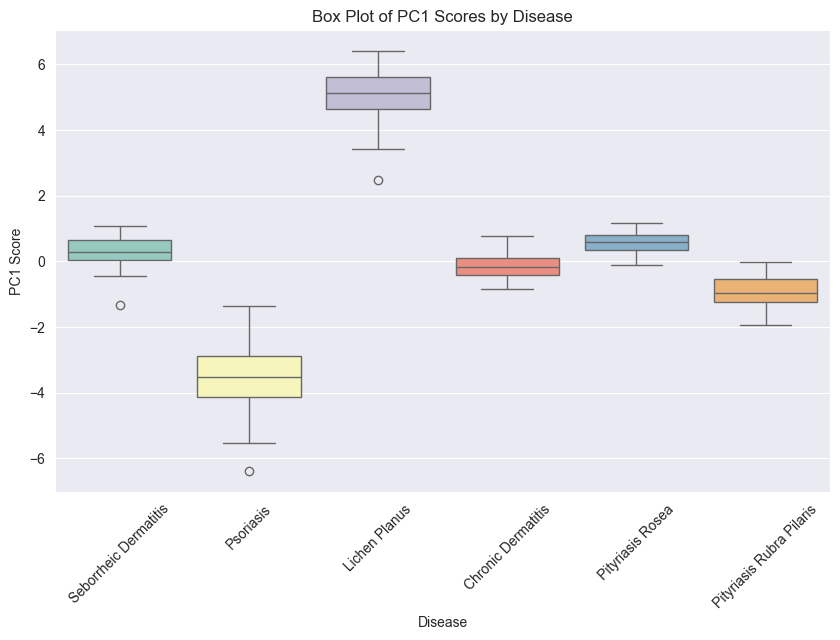

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


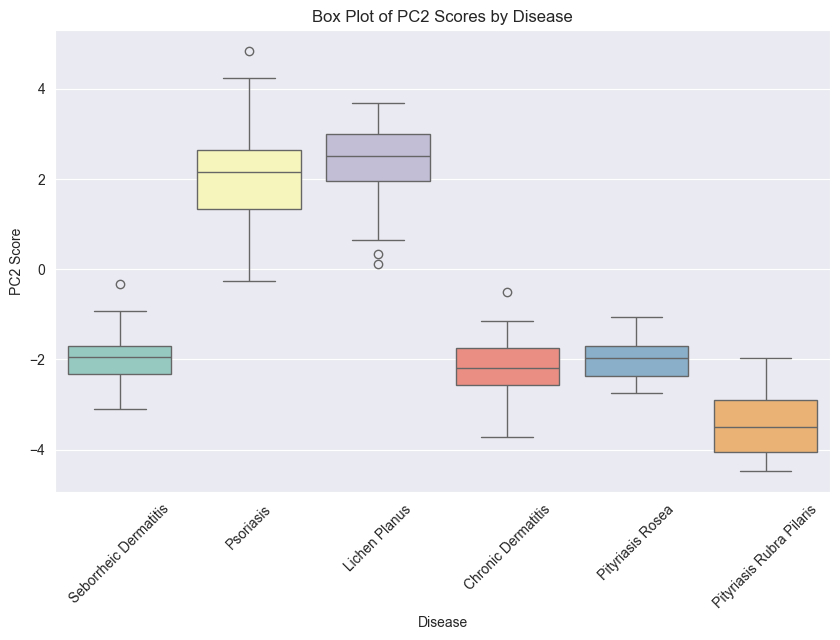

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


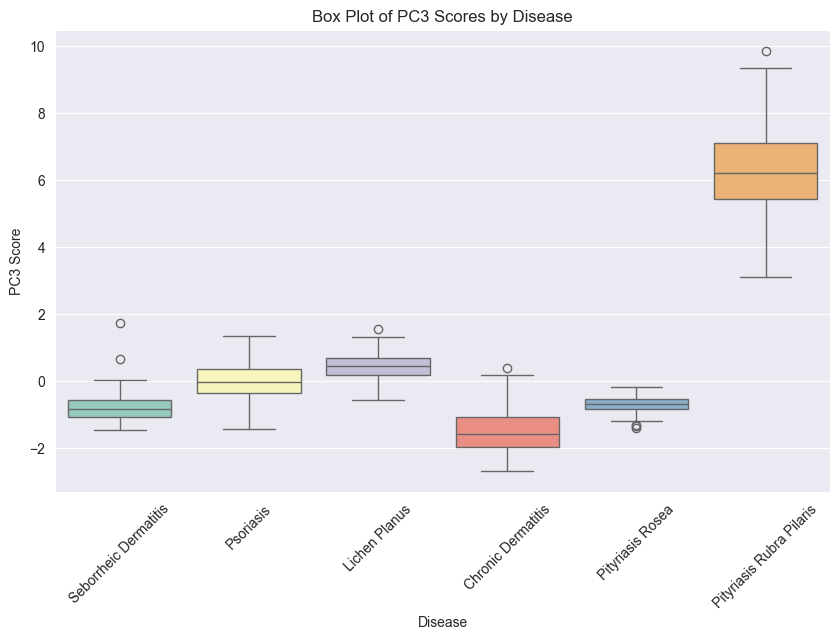

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


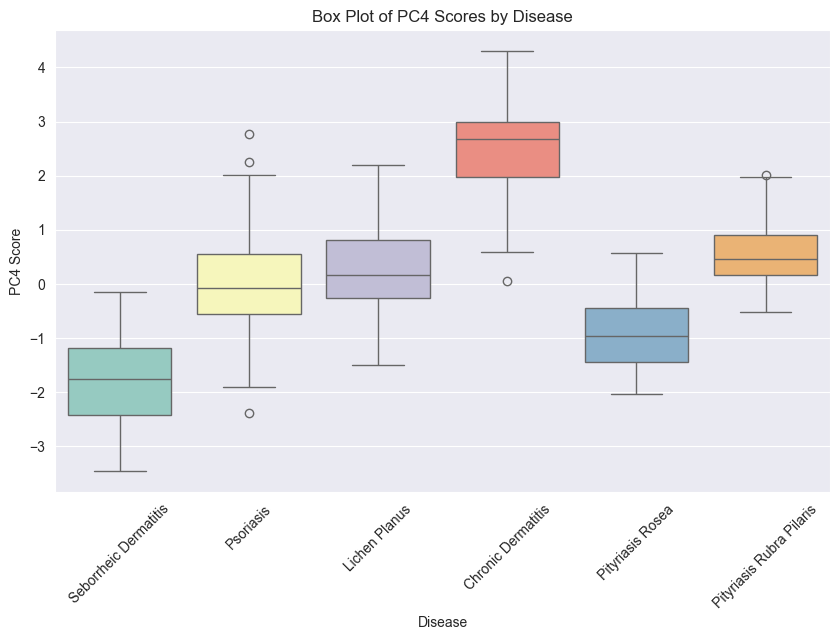

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


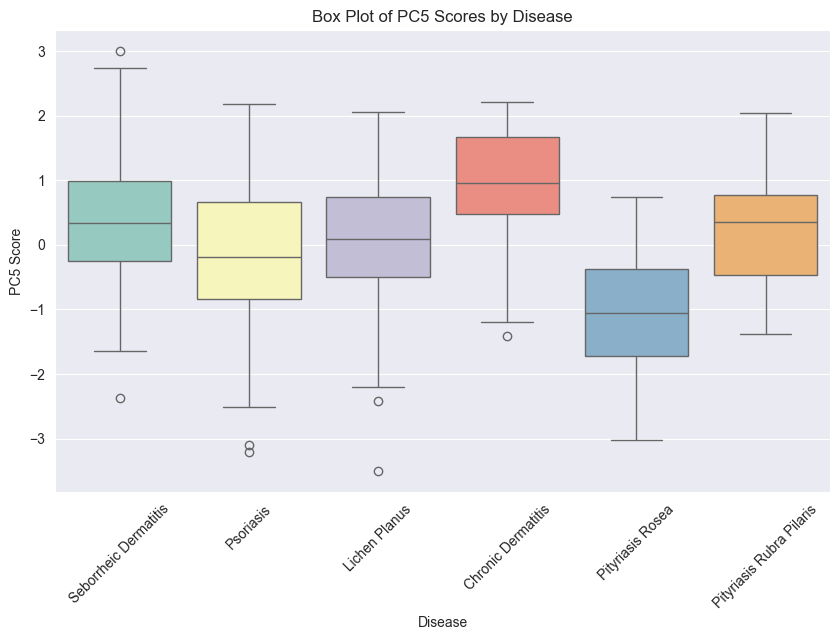

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


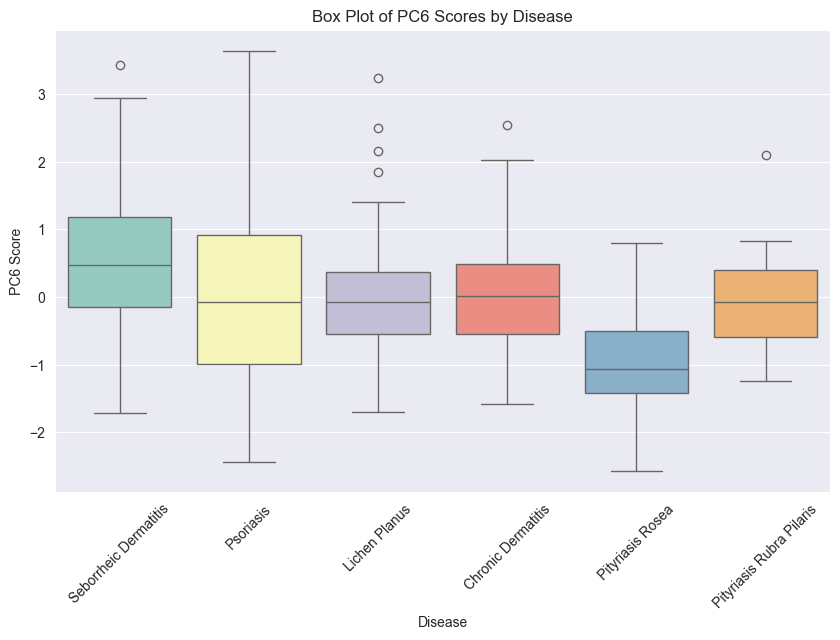

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


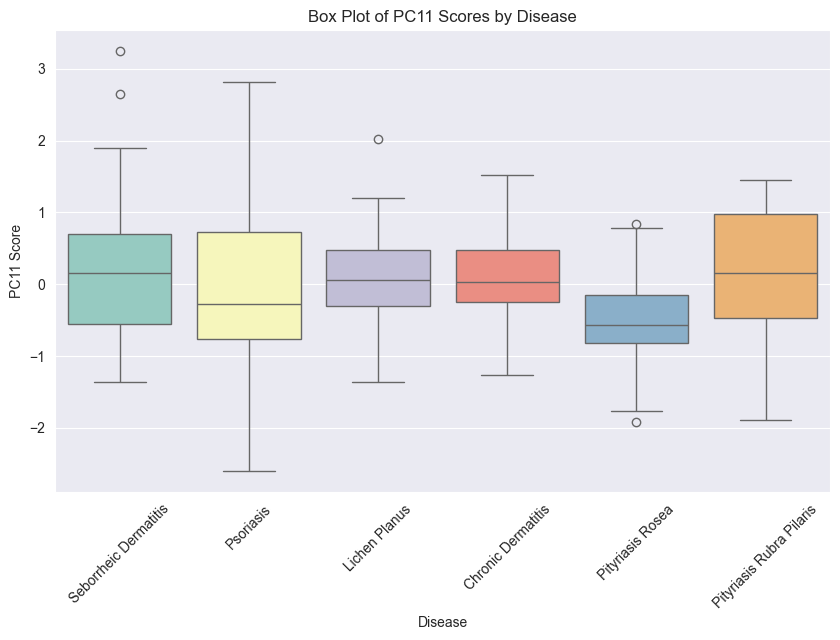

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


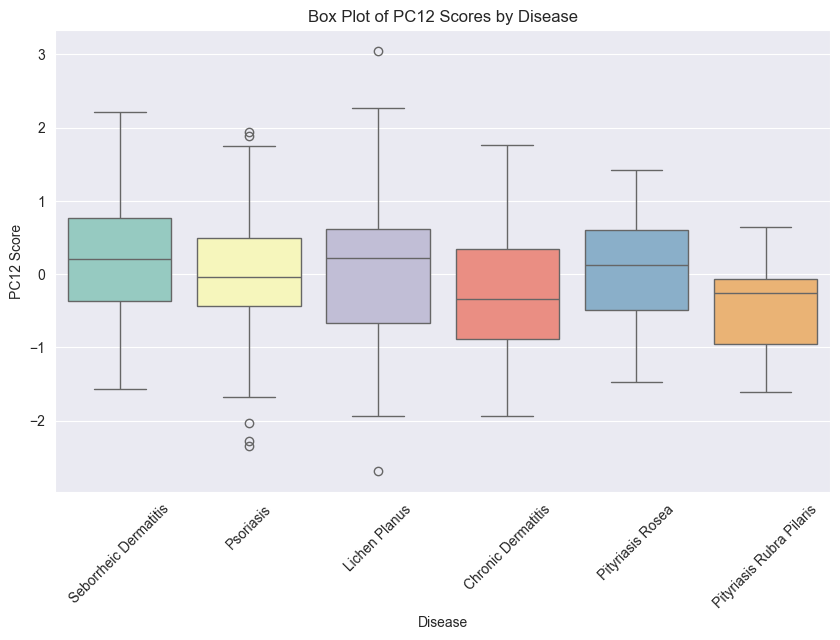

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


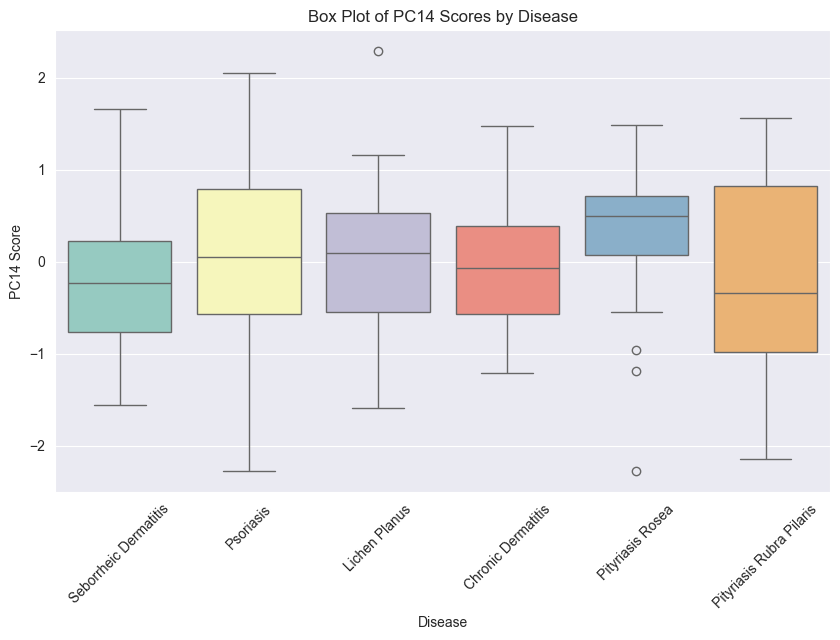

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


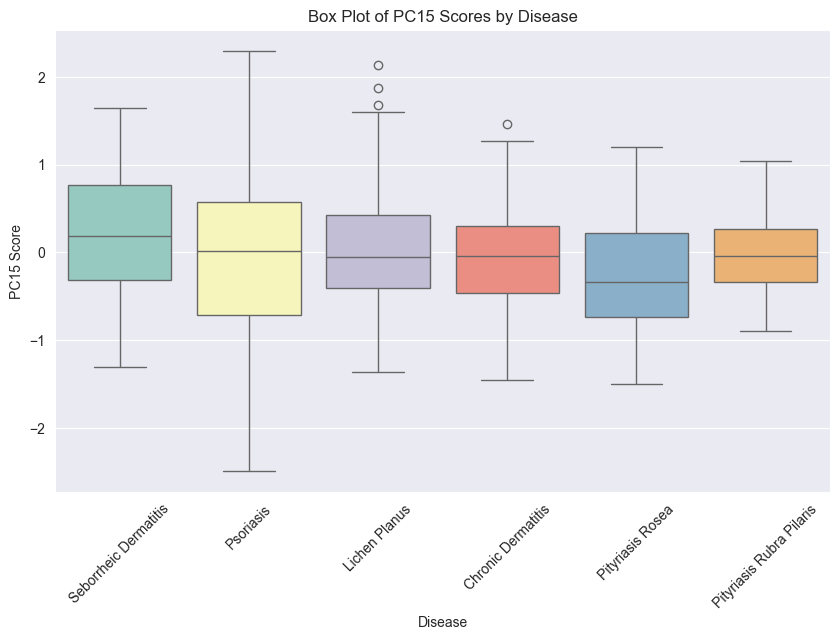

/var/folders/7g/4fp52vwx33v8qqnrh3_pfsyw0000gn/T/ipykernel_2986/2757753879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')


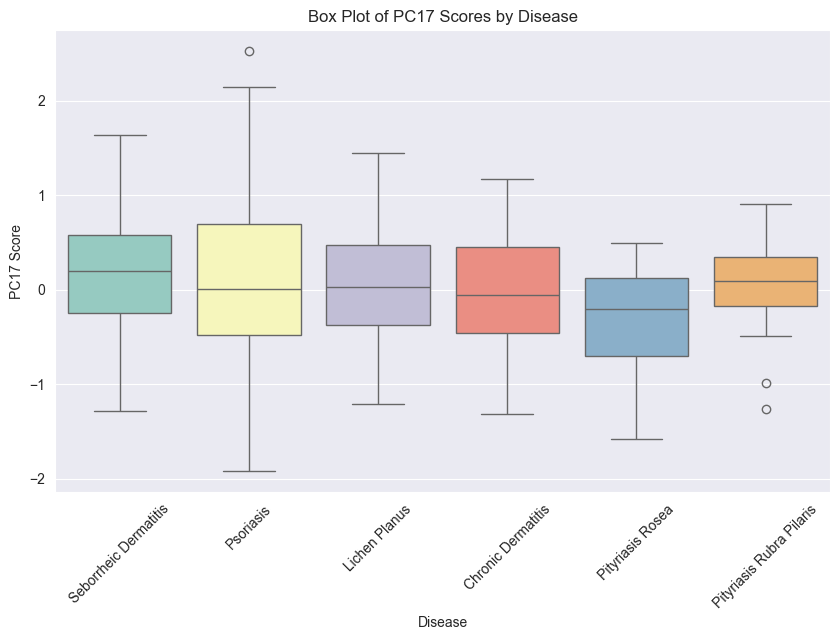

In [47]:
for i in range(len(selected_pcs)):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='class_name', y=X_selected_pcs[:, i], data=df, palette='Set3')
    plt.xlabel('Disease')
    plt.ylabel(f'{pc_names[i]} Score')
    plt.title(f'Box Plot of {pc_names[i]} Scores by Disease')
    plt.xticks(rotation=45)
    plt.savefig(f'boxplot_{pc_names[i]}_by_class.png')
    plt.show()